In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import descartes
import warnings
import seaborn as sns
from geopy.geocoders import Nominatim
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
air_df=pd.read_csv('C:/Users/arjun_0ozfyct/Downloads/Air_Quality_Monitoring_Data.csv')
air_df.head()

C:\Users\arjun_0ozfyct\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time,GPS_cord
0,Civic,"(-35.285307, 149.131579)",07-04-2020 20:00,NaN,0.007,0.013,0.00,7.92,4.57,0.0,0.0,7.0,16.0,15,18,18,07-Apr-20,20:00:00,"-35.285307,149.131579"
1,Monash,"(-35.418302, 149.094018)",07-04-2020 20:00,0.018,0.002,0.015,0.01,6.85,3.69,0.0,15.0,2.0,19.0,13,14,19,07-Apr-20,20:00:00,"-35.418302,149.094018"
2,Florey,"(-35.220606, 149.043539)",07-04-2020 20:00,0.015,0.002,0.016,0.12,8.38,6.49,1.0,12.0,2.0,20.0,16,25,25,07-Apr-20,20:00:00,"-35.220606,149.043539"
3,Florey,"(-35.220606, 149.043539)",07-04-2020 21:00,0.009,0.007,0.011,0.13,8.42,6.63,1.0,8.0,7.0,13.0,16,26,26,07-Apr-20,21:00:00,"-35.220606,149.043539"
4,Monash,"(-35.418302, 149.094018)",07-04-2020 21:00,0.008,0.011,0.011,0.03,7.44,4.37,0.0,6.0,11.0,14.0,14,17,17,07-Apr-20,21:00:00,"-35.418302,149.094018"


In [3]:
lat = []
lon = []
for row in air_df['GPS_cord']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
air_df['latitude'] = lat
air_df['longitude'] = lon

air_df.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,...,AQI_O3_1hr,AQI_O3_4hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time,GPS_cord,latitude,longitude
0,Civic,"(-35.285307, 149.131579)",07-04-2020 20:00,NaN,0.007,0.013,0.00,7.92,4.57,0.0,...,7.0,16.0,15,18,18,07-Apr-20,20:00:00,"-35.285307,149.131579",-35.285307,149.131579
1,Monash,"(-35.418302, 149.094018)",07-04-2020 20:00,0.018,0.002,0.015,0.01,6.85,3.69,0.0,...,2.0,19.0,13,14,19,07-Apr-20,20:00:00,"-35.418302,149.094018",-35.418302,149.094018
2,Florey,"(-35.220606, 149.043539)",07-04-2020 20:00,0.015,0.002,0.016,0.12,8.38,6.49,1.0,...,2.0,20.0,16,25,25,07-Apr-20,20:00:00,"-35.220606,149.043539",-35.220606,149.043539
3,Florey,"(-35.220606, 149.043539)",07-04-2020 21:00,0.009,0.007,0.011,0.13,8.42,6.63,1.0,...,7.0,13.0,16,26,26,07-Apr-20,21:00:00,"-35.220606,149.043539",-35.220606,149.043539
4,Monash,"(-35.418302, 149.094018)",07-04-2020 21:00,0.008,0.011,0.011,0.03,7.44,4.37,0.0,...,11.0,14.0,14,17,17,07-Apr-20,21:00:00,"-35.418302,149.094018",-35.418302,149.094018


In [4]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184398 entries, 0 to 184397
Data columns (total 21 columns):
Name          184398 non-null object
GPS           184397 non-null object
DateTime      184398 non-null object
NO2           124983 non-null float64
O3_1hr        174937 non-null float64
O3_4hr        172970 non-null float64
CO            126804 non-null float64
PM10          176907 non-null object
PM2.5         148296 non-null object
AQI_CO        126618 non-null float64
AQI_NO2       131493 non-null float64
AQI_O3_1hr    174519 non-null float64
AQI_O3_4hr    172726 non-null float64
AQI_PM10      176880 non-null object
AQI_PM2.5     148299 non-null object
AQI_Site      183596 non-null object
Date          184398 non-null object
Time          184398 non-null object
GPS_cord      184397 non-null object
latitude      184397 non-null object
longitude     184397 non-null object
dtypes: float64(8), object(13)
memory usage: 29.5+ MB


In [5]:
import datetime as dt
air_df['Date'] = pd.to_datetime(air_df['Date'])
air_df['year'] = air_df['Date'].dt.year
air_df['month'] = air_df['Date'].dt.month

filtered_dates_17 = air_df[air_df['Date'].dt.year == 2017]
filtered_dates_18 = air_df[air_df['Date'].dt.year == 2018]
filtered_dates_19 = air_df[air_df['Date'].dt.year == 2019]

In [6]:
print (filtered_dates_17.Date.min())
print (filtered_dates_17.Date.max())
print (filtered_dates_18.Date.min())
print (filtered_dates_18.Date.max())
print (filtered_dates_19.Date.min())
print (filtered_dates_19.Date.max())

2017-01-01 00:00:00
2017-12-31 00:00:00
2018-01-01 00:00:00
2018-12-31 00:00:00
2019-01-01 00:00:00
2019-12-31 00:00:00


In [7]:
air_df_17_to_19 = pd.concat([filtered_dates_17, filtered_dates_18, filtered_dates_19])
print (air_df_17_to_19.Date.min())
print (air_df_17_to_19.Date.max())
air_df_17_to_19.head()

2017-01-01 00:00:00
2019-12-31 00:00:00


,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,...,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time,GPS_cord,latitude,longitude,year,month
371,Civic,"(-35.285399, 149.131536)",18-04-2017 16:00,NaN,NaN,0.03,NaN,15,8,NaN,...,29,30,37,2017-04-18,16:00,"-35.285399,149.131536",-35.285399,149.131536,2017,4
393,Civic,"(-35.285399, 149.131536)",17-12-2017 16:00,NaN,NaN,0.04,NaN,10,5,NaN,...,19,22,54,2017-12-17,16:00,"-35.285399,149.131536",-35.285399,149.131536,2017,12
394,Civic,"(-35.285399, 149.131536)",14-12-2017 08:00,NaN,0.01,0.01,NaN,19,10,NaN,...,38,38,38,2017-12-14,08:00,"-35.285399,149.131536",-35.285399,149.131536,2017,12
395,Civic,"(-35.285399, 149.131536)",05-12-2017 11:00,NaN,0.02,0.02,NaN,NaN,1,NaN,...,NaN,4,19,2017-12-05,11:00,"-35.285399,149.131536",-35.285399,149.131536,2017,12
396,Civic,"(-35.285399, 149.131536)",03-12-2017 18:00,NaN,0.02,0.02,NaN,NaN,1,NaN,...,NaN,4,20,2017-12-03,18:00,"-35.285399,149.131536",-35.285399,149.131536,2017,12


C:\Users\arjun_0ozfyct\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


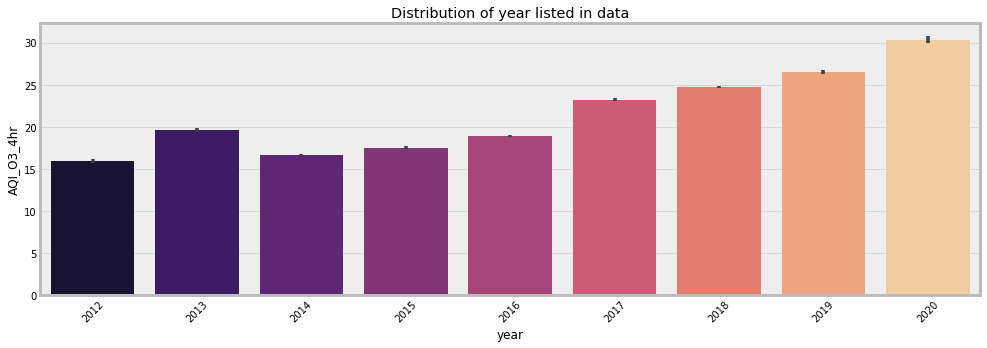

In [8]:
plt.style.use('bmh')
plt.figure(figsize=(15,5))
sns.barplot(air_df['year'], air_df['AQI_O3_4hr'], palette='magma')
plt.xticks(rotation=45)
plt.title('Distribution of year listed in data');

C:\Users\arjun_0ozfyct\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


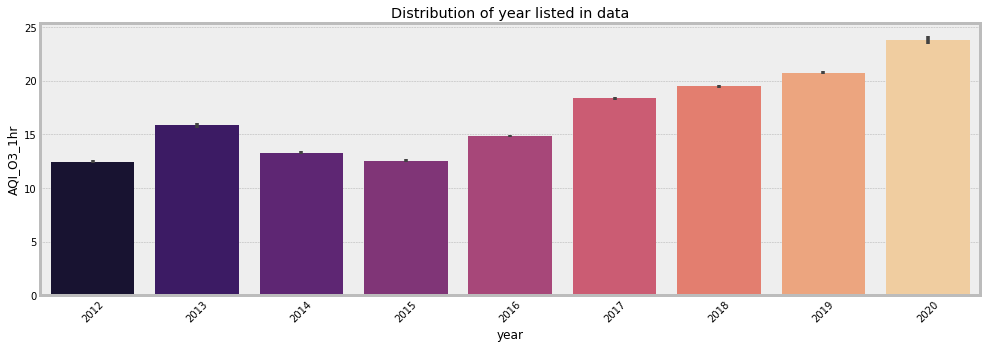

In [9]:
plt.style.use('bmh')
plt.figure(figsize=(15,5))
sns.barplot(air_df['year'], air_df['AQI_O3_1hr'], palette='magma')
plt.xticks(rotation=45)
plt.title('Distribution of year listed in data');

In [10]:
geolocator = Nominatim(user_agent="geoapiExercises")
def city_state_country(coord):
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return city

In [11]:
air_df['city'] = city_state_country(air_df['GPS_cord'][0])


In [12]:
geolocator = Nominatim(user_agent="geoapiExercises")
def city_state_country(coord):
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return state
air_df['state'] = city_state_country(air_df['GPS_cord'][0])

In [13]:
geolocator = Nominatim(user_agent="geoapiExercises")
def city_state_country(coord):
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return country
air_df['country'] = city_state_country(air_df['GPS_cord'][0])

In [14]:
air_df.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,...,Date,Time,GPS_cord,latitude,longitude,year,month,city,state,country
0,Civic,"(-35.285307, 149.131579)",07-04-2020 20:00,NaN,0.007,0.013,0.00,7.92,4.57,0.0,...,2020-04-07,20:00:00,"-35.285307,149.131579",-35.285307,149.131579,2020,4,Canberra,Australian Capital Territory,Australia
1,Monash,"(-35.418302, 149.094018)",07-04-2020 20:00,0.018,0.002,0.015,0.01,6.85,3.69,0.0,...,2020-04-07,20:00:00,"-35.418302,149.094018",-35.418302,149.094018,2020,4,Canberra,Australian Capital Territory,Australia
2,Florey,"(-35.220606, 149.043539)",07-04-2020 20:00,0.015,0.002,0.016,0.12,8.38,6.49,1.0,...,2020-04-07,20:00:00,"-35.220606,149.043539",-35.220606,149.043539,2020,4,Canberra,Australian Capital Territory,Australia
3,Florey,"(-35.220606, 149.043539)",07-04-2020 21:00,0.009,0.007,0.011,0.13,8.42,6.63,1.0,...,2020-04-07,21:00:00,"-35.220606,149.043539",-35.220606,149.043539,2020,4,Canberra,Australian Capital Territory,Australia
4,Monash,"(-35.418302, 149.094018)",07-04-2020 21:00,0.008,0.011,0.011,0.03,7.44,4.37,0.0,...,2020-04-07,21:00:00,"-35.418302,149.094018",-35.418302,149.094018,2020,4,Canberra,Australian Capital Territory,Australia


# Linear Regression

In [15]:
air_df['Name'].unique()

array(['Civic', 'Monash', 'Florey'], dtype=object)

In [26]:
# Library Imports
import urllib
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
#Drop unwanted columns
air_df = air_df.drop(['Name','GPS','DateTime','Date','Time','GPS_cord','latitude','longitude','city','state','country'],axis=1)

In [18]:
# Remove na values
columns = ['NO2','O3_1hr','O3_4hr','CO','PM10','PM2.5','AQI_CO','AQI_NO2','AQI_O3_1hr','AQI_O3_4hr','AQI_PM10','AQI_PM2.5','AQI_Site'
          ,'year','month']
for col in columns:
    air_df[col] = air_df[col].fillna(value=0)

In [19]:
air_df[columns] = air_df[columns].apply(pd.to_numeric, errors='coerce', axis=1)
air_df = air_df.dropna()
air_df.head()

,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_PM10,AQI_PM2.5,AQI_Site,year,month
0,0.000,0.007,0.013,0.00,7.92,4.57,0.0,0.0,7.0,16.0,15.0,18.0,18.0,2020.0,4.0
1,0.018,0.002,0.015,0.01,6.85,3.69,0.0,15.0,2.0,19.0,13.0,14.0,19.0,2020.0,4.0
2,0.015,0.002,0.016,0.12,8.38,6.49,1.0,12.0,2.0,20.0,16.0,25.0,25.0,2020.0,4.0
3,0.009,0.007,0.011,0.13,8.42,6.63,1.0,8.0,7.0,13.0,16.0,26.0,26.0,2020.0,4.0
4,0.008,0.011,0.011,0.03,7.44,4.37,0.0,6.0,11.0,14.0,14.0,17.0,17.0,2020.0,4.0


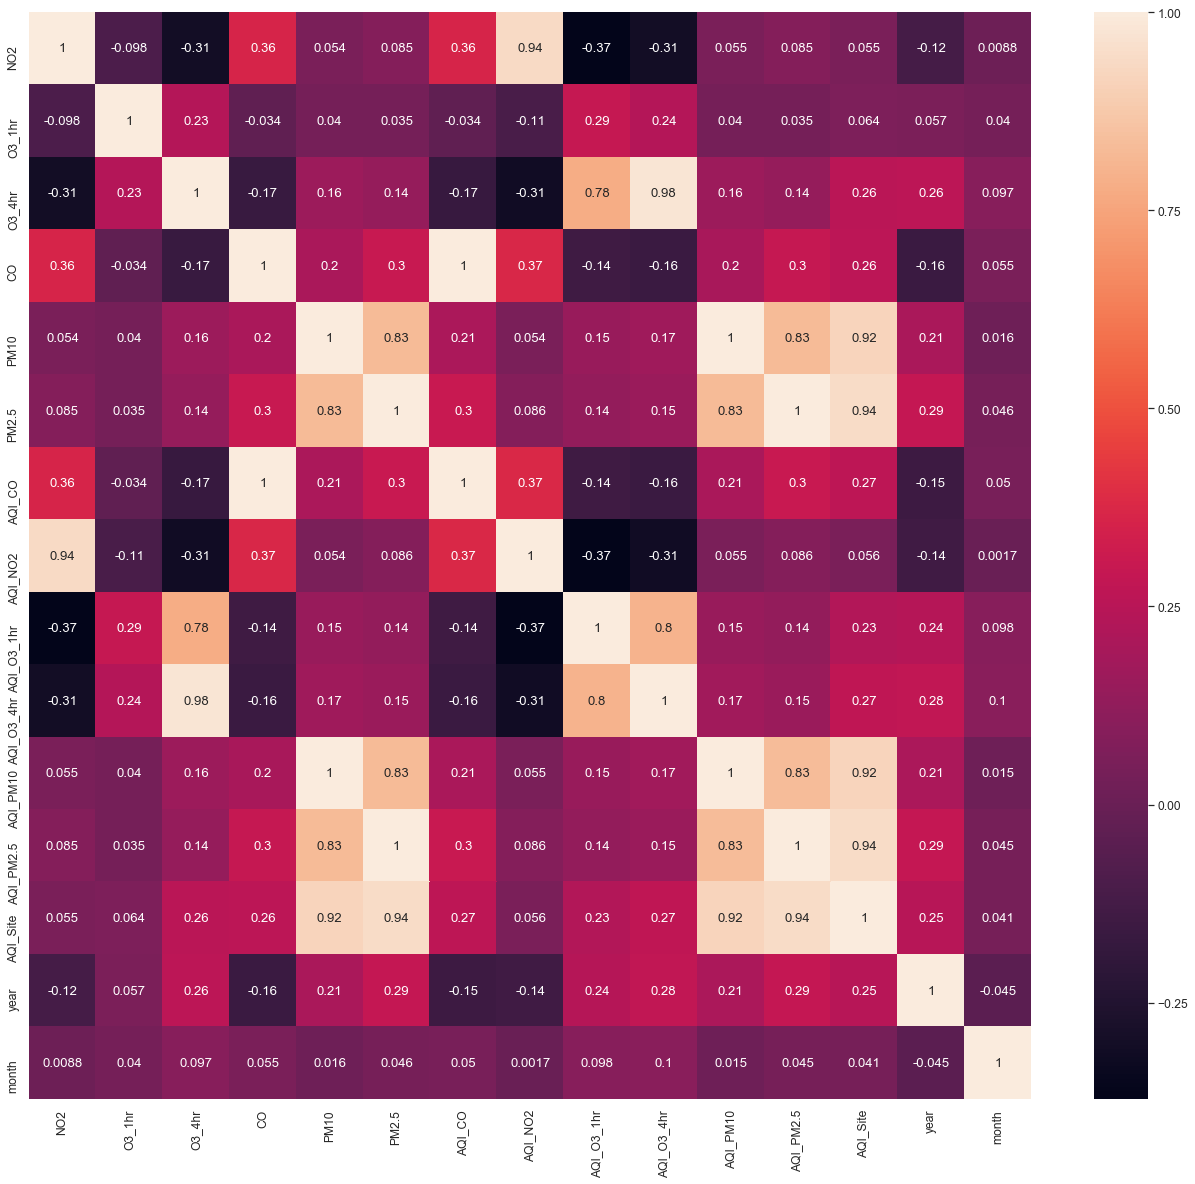

In [20]:
# Check correlation between features
plt.figure(figsize=(20,20))                   
sns.set(font_scale=1.1)
sns.heatmap(air_df.corr(),annot=True)

# Predicting AQI_O3_4hr i.e 4-hour ozone AQI (Air Quality Index)

In [21]:
# Prepare the dataset
X = air_df.drop(['AQI_O3_4hr'],axis=1)
y = air_df['AQI_O3_4hr']

# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)


In [22]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-345.7370765585023
[-6.87693852e+00 -3.90106801e-01  1.06083519e+03 -1.45752325e+00
 -2.60235829e-02  2.87978883e-02  1.35653948e-01  1.19181504e-02
  1.06187608e-01 -4.39256692e-03 -3.05843448e-02  3.85394030e-02
  1.71678263e-01  3.68643184e-02]


In [24]:
y_pred = regressor.predict(X_test)

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
61570,1.0,1.003899
56513,29.0,25.496058
60185,35.0,35.207792
19798,6.0,6.284431
107526,0.0,2.535541
46085,31.0,36.699797
115158,27.0,24.882232
66933,22.0,23.527800
43876,28.0,25.529902
58890,3.0,1.261545


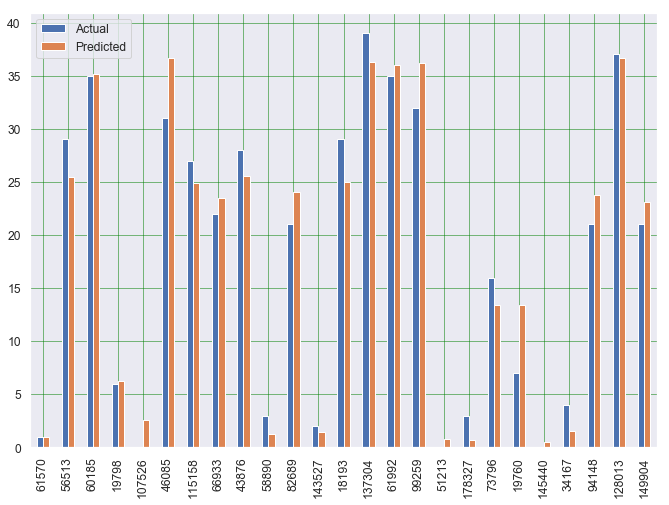

In [33]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.37660987457816
Mean Squared Error: 9.286591528459896
Root Mean Squared Error: 3.0473909379106408
